<a href="https://colab.research.google.com/github/chrisaMel/Machine-Learning/blob/Bankruptcy-Classifier/BankruptcyClassifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#1. Διαβάζει τα δεδομένα από το αρχείο excel.
from logging import exception
import pandas as pd

#Ανέβασμα αρχείου με δεδομένα
datafilelink = 'https://docs.google.com/spreadsheets/d/1xfNYsymJs0cuhcH7-Vi4hy0wB5uuujkf/export?format=xlsx'

#Επιτυχημένη λήψη του αρχείου
try :
  dataset = pd.read_excel(datafilelink)
  print('The file is properly read')
  print(dataset.head())

except FileNotFoundError:
 print('The file was not found, try chainging the name')

except Exception as e:
 print(" Some other error occured",{e})



The file is properly read
   365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0              1014.128862                    0.011751   
1               561.974631                    0.099662   
2               826.919025                    0.009594   
3               493.176956                    0.196284   
4               100.421465                    0.179038   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.038505                                        0.965479   
1                 0.015775                                        1.415467   
2                 0.093562                                        1.575034   
3                 0.000581                                        1.346780   
4                 0.000173                                        3.299687   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0           567.866550             0.532258                     545.195964   


In [ ]:
print("Types of data \n")
print(dataset.info())

In [ ]:
print("Description of the data \n")
print(dataset.describe())  # Στατιστικά περιγραφικά στοιχεία

In [3]:
# Ομαδοποίηση δεδομένων ανά έτος και κατάσταση (1 = υγιής, 2 = χρεοκοπημένη)
grouped_data = dataset.groupby(['ΕΤΟΣ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']).size().unstack()

# Αντικατάσταση των NaN με 0, αν υπάρχουν
grouped_data = grouped_data.fillna(0)

# Προεπισκόπηση των δεδομένων
print(grouped_data)


ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)     1   2
ΕΤΟΣ                                   
2006                           2748  52
2007                           2846  53
2008                           2731  99
2009                           2143  44


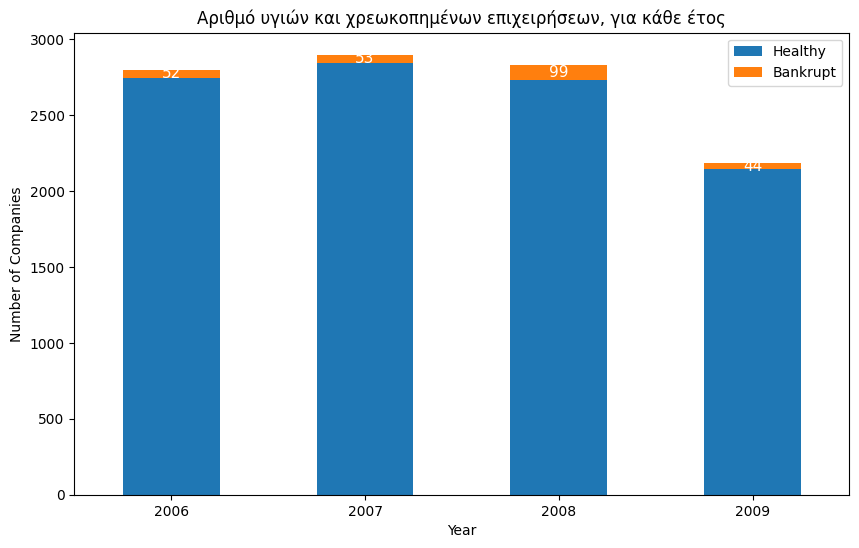

In [4]:
# 2.a) Tυπώνει, σε γραφήματα τον αριθμό υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος
import matplotlib.pyplot as plt

# # Δημιουργία stacked bar plot
# grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# # Προσθήκη τίτλου και ετικετών
# plt.title('Stacked Bar Plot of Companies per Year')
# plt.xlabel('Year')
# plt.ylabel('Total Number of Companies')
# plt.legend(['Healthy', 'Bankrupt'])
# plt.xticks(rotation=45)

# # Εμφάνιση του γραφήματος
# plt.show()


# Δημιουργία stacked bar plot για τον Αριθμό υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Προσθήκη ετικετών για τις bankrupt επιχειρήσεις (πάνω από το σωστό σημείο κάθε μπάρας)
for i, (healthy, bankrupt) in enumerate(zip(grouped_data[1], grouped_data[2])):
    # Ετικέτα για bankrupt (πάνω από το stacked μέρος)
    ax.text(i, healthy + bankrupt / 2, str(int(bankrupt)), ha='center', va='center', color='white', fontsize=11)

# Προσθήκη τίτλου και ετικετών αξόνων
plt.title('Αριθμό υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.legend(['Healthy', 'Bankrupt'])
plt.xticks(rotation=360)

# Εμφάνιση του γραφήματος
plt.show()


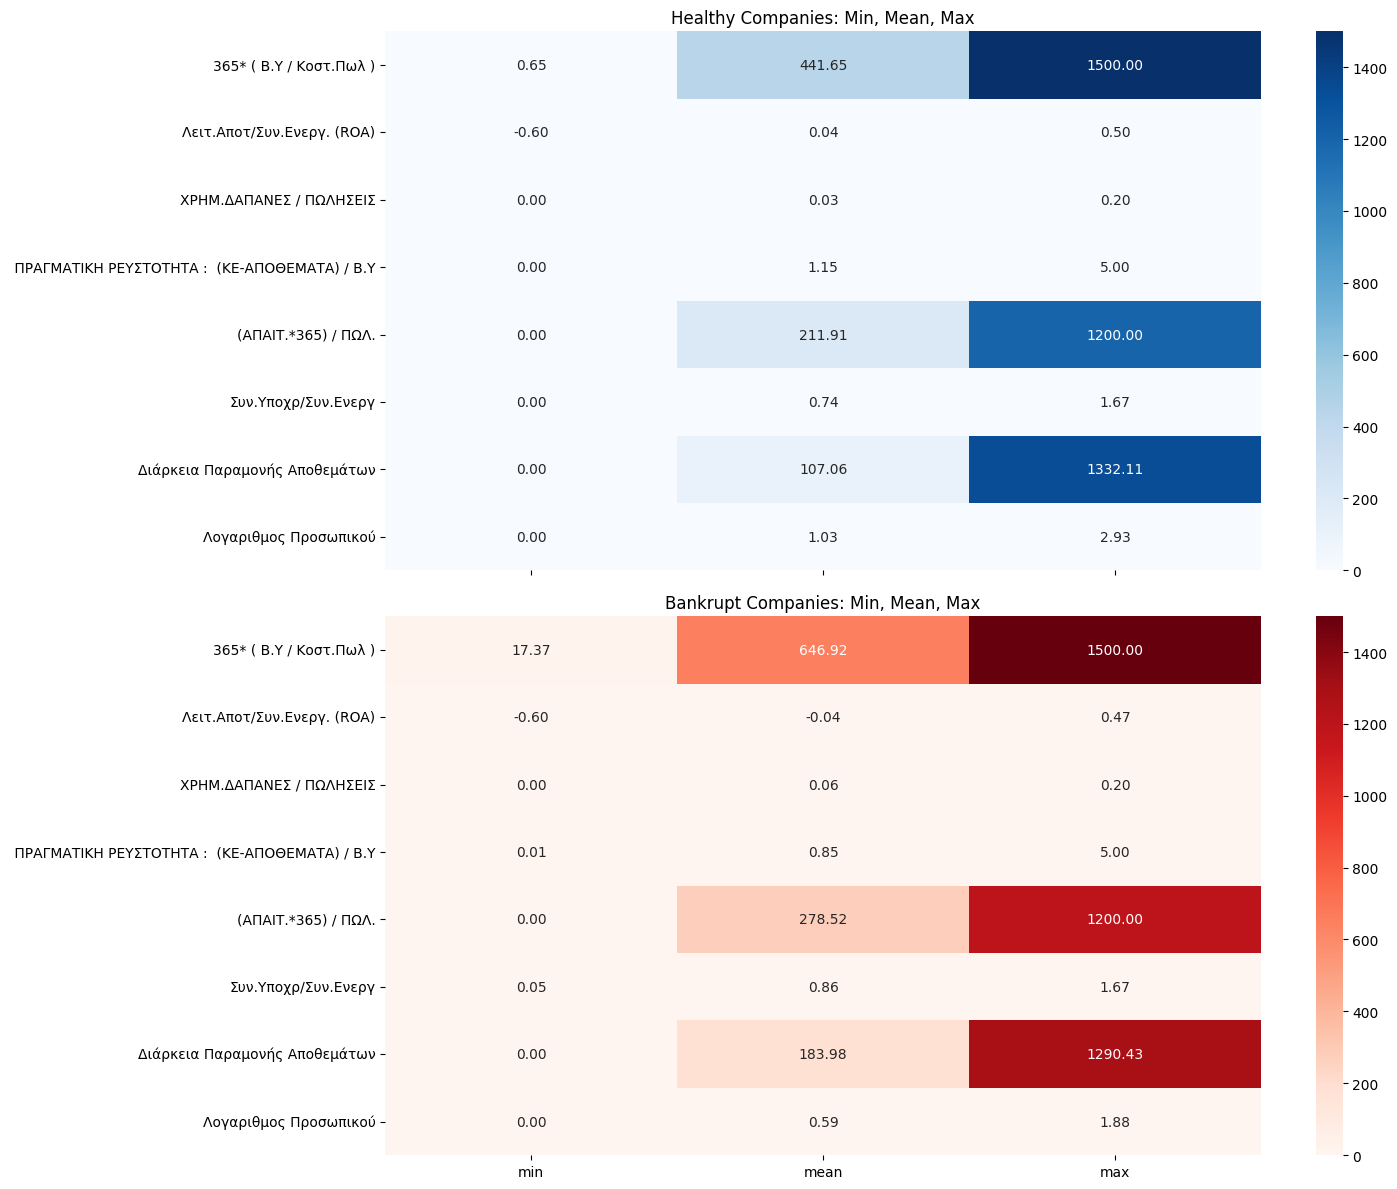

In [5]:

# 2.b) Tυπώνει, σε γραφήματα τα min, max, average τιμή για κάθε δείκτη

import seaborn as sns


# Διαχωρισμός των δεδομένων
healthy = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1]
bankrupt = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 2]

# Λίστα με στήλες για ανάλυση
columns_to_analyze = [
    '365* ( Β.Υ / Κοστ.Πωλ )',
    'Λειτ.Αποτ/Συν.Ενεργ. (ROA)',
    'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ',
    ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ',
    '(ΑΠΑΙΤ.*365) / ΠΩΛ.',
    'Συν.Υποχρ/Συν.Ενεργ',
    'Διάρκεια Παραμονής Αποθεμάτων',
    'Λογαριθμος Προσωπικού'
]

# Dictionary για συντομευμένα labels
short_labels = {
    '365* ( Β.Υ / Κοστ.Πωλ )': 'Inventory Turnover',
    'Λειτ.Αποτ/Συν.Ενεργ. (ROA)': 'ROA',
    'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ': 'Fin Exp/Sales',
    ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ': 'Real Liquidity',
    '(ΑΠΑΙΤ.*365) / ΠΩΛ.': 'Receiv Turn',
    'Συν.Υποχρ/Συν.Ενεργ': 'Liab/Assets',
    'Διάρκεια Παραμονής Αποθεμάτων': 'Inv Days',
    'Λογαριθμος Προσωπικού': 'Log Employees'
}

# Υπολογισμός στατιστικών
healthy_stats = healthy[columns_to_analyze].describe().loc[['min', 'mean','max']]
bankrupt_stats = bankrupt[columns_to_analyze].describe().loc[['min', 'mean','max']]

# Μετονομασία των σειρών
healthy_stats = healthy_stats.rename(index=short_labels)
bankrupt_stats = bankrupt_stats.rename(index=short_labels)

# Δημιουργία του subplot
fig, axs = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Υγιείς εταιρείες heatmap
sns.heatmap(healthy_stats.T, annot=True, fmt=".2f", cmap='Blues', ax=axs[0])
axs[0].set_title('Healthy Companies: Min, Mean, Max')
axs[0].tick_params(axis='x')

# Πτωχευμένες εταιρείες heatmap
sns.heatmap(bankrupt_stats.T, annot=True, fmt=".2f", cmap='Reds', ax=axs[1])
axs[1].set_title('Bankrupt Companies: Min, Mean, Max')
axs[1].tick_params(axis='x')

plt.tight_layout()
plt.show()


In [ ]:
#Εναλλακτηκό figure 2
# from sklearn.preprocessing import StandardScaler
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Διαχωρισμός των δεδομένων
# healthy = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1]
# bankrupt = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 2]

# # Λίστα με στήλες για ανάλυση
# columns_to_analyze = [
#     '365* ( Β.Υ / Κοστ.Πωλ )',
#     'Λειτ.Αποτ/Συν.Ενεργ. (ROA)',
#     'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ',
#     ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ',
#     '(ΑΠΑΙΤ.*365) / ΠΩΛ.',
#     'Συν.Υποχρ/Συν.Ενεργ',
#     'Διάρκεια Παραμονής Αποθεμάτων',
#     'Λογαριθμος Προσωπικού'
# ]

# # Τυποποίηση (Z-Score) για υγιείς εταιρείες
# scaler = StandardScaler()
# healthy_standardized = pd.DataFrame(
#     scaler.fit_transform(healthy[columns_to_analyze]),
#     columns=columns_to_analyze
# )

# # Τυποποίηση (Z-Score) για πτωχευμένες εταιρείες
# bankrupt_standardized = pd.DataFrame(
#     scaler.fit_transform(bankrupt[columns_to_analyze]),
#     columns=columns_to_analyze
# )

# # Dictionary για συντομευμένα labels
# short_labels = {
#     '365* ( Β.Υ / Κοστ.Πωλ )': 'Inventory Turnover',
#     'Λειτ.Αποτ/Συν.Ενεργ. (ROA)': 'ROA',
#     'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ': 'Fin Exp/Sales',
#     ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ': 'Real Liquidity',
#     '(ΑΠΑΙΤ.*365) / ΠΩΛ.': 'Receiv Turn',
#     'Συν.Υποχρ/Συν.Ενεργ': 'Liab/Assets',
#     'Διάρκεια Παραμονής Αποθεμάτων': 'Inv Days',
#     'Λογαριθμος Προσωπικού': 'Log Employees'
# }

# # Υπολογισμός στατιστικών
# healthy_stats = healthy_standardized.describe().loc[['min', 'mean', 'max']]
# bankrupt_stats = bankrupt_standardized.describe().loc[['min', 'mean', 'max']]

# # Μετονομασία των σειρών
# healthy_stats = healthy_stats.rename(index=short_labels)
# bankrupt_stats = bankrupt_stats.rename(index=short_labels)

# # Δημιουργία του subplot
# fig, axs = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# # Υγιείς εταιρείες heatmap
# sns.heatmap(healthy_stats.T, annot=True, fmt=".2f", cmap='Blues', ax=axs[0])
# axs[0].set_title('Healthy Companies: Min, Mean, Max (Normalized)')
# axs[0].tick_params(axis='x')

# # Πτωχευμένες εταιρείες heatmap
# sns.heatmap(bankrupt_stats.T, annot=True, fmt=".2f", cmap='Reds', ax=axs[1])
# axs[1].set_title('Bankrupt Companies: Min, Mean, Max (Normalized)')
# axs[1].tick_params(axis='x')

# plt.tight_layout()
# plt.show()


In [6]:
# 3. Έλεγχος για τυχόν ελλιπείς εγγραφές
if dataset.isnull().values.any():
    print("Υπάρχουν ελλιπείς εγγραφές (NaN) στο dataset.")
    print(dataset.isnull().sum())  # Εμφάνιση του αριθμού των NaN ανά στήλη
else:
    print("Δεν υπάρχουν ελλιπείς εγγραφές (NaN) στο dataset.")

Δεν υπάρχουν ελλιπείς εγγραφές (NaN) στο dataset.


In [7]:
# 4. Κανονικοποίηση δεδομένων στο διάστημα [0,1]
#Κανονικοποίηση μόνο των τιμών που δεν είναι εξάρχησ στο διάστημα αυτό και εκτός το δείκτη Ενδειξη Ασυνέπειας

from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = [
    '365* ( Β.Υ / Κοστ.Πωλ )',
    'Λειτ.Αποτ/Συν.Ενεργ. (ROA)',
    'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ',
    ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ',
    '(ΑΠΑΙΤ.*365) / ΠΩΛ.',
    'Συν.Υποχρ/Συν.Ενεργ',
    'Διάρκεια Παραμονής Αποθεμάτων',
    'Λογαριθμος Προσωπικού',
    'ΕΤΟΣ'
]

# Δημιουργία του MinMaxScaler
scaler = MinMaxScaler()

# Εφαρμογή κανονικοποίησης
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

print("Τα δεδομένα έχουν κανονικοποιηθεί στο διάστημα [0,1].")
print(dataset.describe())

Τα δεδομένα έχουν κανονικοποιηθεί στο διάστημα [0,1].
       365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
count             10716.000000                10716.000000   
mean                  0.297293                    0.579531   
std                   0.257869                    0.115030   
min                   0.000000                    0.000000   
25%                   0.115054                    0.549574   
50%                   0.216568                    0.571106   
75%                   0.380265                    0.618654   
max                   1.000000                    1.000000   

       ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ  \
count             10716.000000   
mean                  0.144647   
std                   0.190035   
min                   0.000000   
25%                   0.010050   
50%                   0.075716   
75%                   0.207091   
max                   1.000000   

        ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  (ΑΠΑΙΤ.*365) / ΠΩΛ.  \
co

In [8]:
# 5.Kάνει χρήση του Stratified kfold ώστε να δημιουργεί 4 folds
from sklearn.model_selection import StratifiedKFold

# Δημιουργία του Stratified K-Fold αντικειμένου
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Στόχοι (target variable)
X = dataset.drop(columns=['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'])  # Όλα τα χαρακτηριστικά εκτόσ label
y = dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']  # Ετικέτες (1: Υγιής, 2: Χρεοκοπημένη)

# Δημιουργία των folds
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"Fold {fold}:")
    print(f"Train Indices: {train_index[:10]}... Total: {len(train_index)}")  # Εμφάνιση των πρώτων 10 δεικτών
    print(f"Test Indices: {test_index[:10]}... Total: {len(test_index)}")

    # Διαχωρισμός δεδομένων
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train Labels Distribution: \n{y_train.value_counts(normalize=True)}")
    print(f"Test Labels Distribution: \n{y_test.value_counts(normalize=True)}")

    fold += 1


Fold 1:
Train Indices: [ 0  1  3  4  5  6  8  9 10 11]... Total: 8037
Test Indices: [ 2  7 13 21 25 36 37 40 41 43]... Total: 2679
Train Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Test Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Fold 2:
Train Indices: [ 0  1  2  3  5  6  7  8 10 11]... Total: 8037
Test Indices: [ 4  9 14 15 16 20 32 33 35 39]... Total: 2679
Train Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Test Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Fold 3:
Train Indices: [ 2  4  5  7  8  9 12 13 14 15]... Total: 8037
Test Indices: [ 0  1  3  6 10 11 18 22 27 29]... Total: 2679
Train Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Test Labels Di

In [9]:
fold = 1

for train_i, test_i in skf.split(X,y) :

   y_train, y_test = y.iloc[train_i], y.iloc[test_i]

   count_b_in_train = (y_train == 2).sum()
   count_not_b_in_train = (y_train == 1).sum()

   count_b_in_test = (y_test == 2).sum()
   count_not_b_in_test = (y_test == 1).sum()

   print(f"Fold {fold}:")
   print(f"Train Set: {count_b_in_train} bankrupt companies, {count_not_b_in_train} NOT bankrupt companies")
   print(f"Test Set: {count_b_in_test} bankrupt companies, {count_not_b_in_test} NOT bankrupt companies\n")

   fold+=1







Fold 1:
Train Set: 186 bankrupt companies, 7851 NOT bankrupt companies
Test Set: 62 bankrupt companies, 2617 NOT bankrupt companies

Fold 2:
Train Set: 186 bankrupt companies, 7851 NOT bankrupt companies
Test Set: 62 bankrupt companies, 2617 NOT bankrupt companies

Fold 3:
Train Set: 186 bankrupt companies, 7851 NOT bankrupt companies
Test Set: 62 bankrupt companies, 2617 NOT bankrupt companies

Fold 4:
Train Set: 186 bankrupt companies, 7851 NOT bankrupt companies
Test Set: 62 bankrupt companies, 2617 NOT bankrupt companies



In [11]:
from sklearn.utils import resample

fold = 1

for train_i, test_i in skf.split(X, y):
    # Διαχωρισμός του training set
    X_train, y_train = X.iloc[train_i], y.iloc[train_i]
    X_test, y_test = X.iloc[test_i], y.iloc[test_i]

    # Χωρισμός των training δεδομένων σε υγιείς (class 1) και χρεοκοπημένες (class 2)
    X_train_healthy = X_train[y_train == 1]
    X_train_bankrupt = X_train[y_train == 2]

    # Ανάλογοι αριθμοί υγιών και χρεοκοπημένων στο training set
    num_healthy = len(X_train_healthy)
    num_bankrupt = len(X_train_bankrupt)

    # Έλεγχος αν η αναλογία είναι μεγαλύτερη από 3:1
    if num_healthy > 3 * num_bankrupt:
        # Τυχαία επιλογή 3x των χρεοκοπημένων εταιρειών
        X_train_healthy_resampled = resample(X_train_healthy,
                                             replace=False,
                                             n_samples=3 * num_bankrupt,
                                             random_state=42)
        # Ενοποίηση των δεδομένων
        X_train_resampled = pd.concat([X_train_healthy_resampled, X_train_bankrupt])
        y_train_resampled = pd.concat([
            pd.Series([1] * len(X_train_healthy_resampled)),
            pd.Series([2] * len(X_train_bankrupt))
        ])
    else:
        # Δεν χρειάζεται παρέμβαση
        X_train_resampled = X_train
        y_train_resampled = y_train

    # Εκτύπωση αναλογιών
    print(f"Fold {fold}:")
    print(f"Train Set: {len(y_train_resampled[y_train_resampled == 1])} healthy companies, "
          f"{len(y_train_resampled[y_train_resampled == 2])} bankrupt companies")
    print(f"Test Set: {len(y_test[y_test == 1])} healthy companies, {len(y_test[y_test == 2])} bankrupt companies\n")

    fold += 1


Fold 1:
Train Set: 558 healthy companies, 186 bankrupt companies
Test Set: 2617 healthy companies, 62 bankrupt companies

Fold 2:
Train Set: 558 healthy companies, 186 bankrupt companies
Test Set: 2617 healthy companies, 62 bankrupt companies

Fold 3:
Train Set: 558 healthy companies, 186 bankrupt companies
Test Set: 2617 healthy companies, 62 bankrupt companies

Fold 4:
Train Set: 558 healthy companies, 186 bankrupt companies
Test Set: 2617 healthy companies, 62 bankrupt companies

